Теоретический материал – Эволюционные методы
Деревья решений являются одним из наиболее эффективных 
Эволюционные методы
Эволюционные методы относятся к числу эффективных средств 
решения задач оптимизации и структурного синтеза проектных решений. 
Они основаны на использовании принципов оптимального приспособления 
организмов в живой природе к условиям окружающей среды. К числу 
эволюционных относятся методы генетические, колонии муравьев, 
поведения толпы. Наиболее развиты и востребованы в настоящее время 
генетические алгоритмы. По мере развития техники и технологий растет 
доля сложных задач проектирования и управления, для решения которых 
применение традиционных методов проблематично. Поэтому все большее 
внимание уделяется применению методов искусственного интеллекта. 
Генетические алгоритмы Для применения ГА необходимо:
1. выделить совокупность свойств объекта, характеризуемых 
внутренними параметрами и влияющих на его полезность, т.е. выделить 
множество управляемых параметровX=(x_1,x_2,…,x_n) среди x_i могут 
быть величины различных типов (real, integer, Boolean, enumeration). 
Наличие нечисловых величин (enumeration) обусловливает возможность 
решения задач не только параметрической, но и структурной оптимизации;
2. сформулировать количественную оценку полезности вариантов 
объекта — функцию полезности F. Если в исходном виде задача 
многокритериальна, то такая формулировка означает выбор скалярного 
(обобщенного) критерия;
3. представить вектор X в форме хромосомы — записи 
следующего вида:
Этапы генетического алгоритма могут быть представлены в 
следующем виде:
for (k=0; k<G; k++)
{ for (j=0; j<N; j++)
 { Выбор родительской пары хромосом;
 Кроссовер;
 Мутации;
 Оценка функции полезности F потомков;
 Селекция;
 }
 Замена текущего поколения новым;
}


1.1.1 Пример
Задача:
Пусть дана начальная популяция из четырех хромосом с двумя 
генами x и y. Показатель качества хромосомы оценивается функцией Z. 
При равном качестве хромосом предпочтение отдается хромосоме с 
большим номером. На каждом этапе хромосома a с высшим качеством 
порождает четыре новых хромосомы 𝑏1, 𝑐1, 𝑏2, 𝑐2, обмениваясь генами с 
двумя хромосомами b и c более низкого качества по указанной схеме:
Последняя хромоcома (с низшим качеством) выбывает из 
популяции. Найти максимальный показатель качества хромосомы в 
популяции и общее качество популяции после четырех этапов эволюции.
Потребуется несколько функций для реализации алгоритма. Напишем их.

In [1]:
# Define the quality function of a chromosome
def qZ(x, y):
    return (x - 3 * y + 1) / (3 * x ** 2 + 3 * y ** 2 + 1)

# Define the sum of quality of chromosomes
def qSumZ(Z):
    return sum(Z)

# Define an exchange scheme for chromosomes
def exchangeScheme(oldX, oldY, sortedId):
    x = [0 for i in range(4)]
    y = [0 for i in range(4)]
    
    x[2] = oldX[sortedId[2]]
    x[3] = oldX[sortedId[2]]
    
    x[0] = oldX[sortedId[0]]
    
    x[1] = oldX[sortedId[1]]
    
    y[0] = oldY[sortedId[2]]
    y[1] = oldY[sortedId[2]]
    
    y[2] = oldY[sortedId[0]]
    
    y[3] = oldY[sortedId[1]]
    
    return x, y

# Define a sorting function for chromosomes
def sorting(Z):
    sortedId = sorted(range(len(Z)), key=lambda k: Z[k])
    return sortedId

# Define an evolution step
def evoStep(x, y, z):
    _, minId = min((value, id) for (id, value) in enumerate(z))
    x = x[:]
    y = y[:]
    z = z[:]
    
    x.pop(minId)
    y.pop(minId)
    z.pop(minId)
    
    return x, y, z

# Define evolution steps function, by default 4 steps
def evoSteps(x, y, steps_num=4):
    results = []
    
    for i in range(steps_num):
        arrZ = [qZ(k, y[i]) for i, k in enumerate(x)]
        
        x, y, z = evoStep(x, y, arrZ)
        
        x, y = exchangeScheme(x, y, sorting(z))
        
        results.append([x, y, qSumZ(arrZ), arrZ])
    
    return x, y, results

# Declare arrays of chromosomes
x = [-2, -1, 0, 1]
y = [-2, -1, 0, 1]

results = evoSteps(x, y)

for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z: {max(qualityArrZ)}')


max_1_step: 1.4857142857142858
max_2_step: 1.4615384615384615
max_3_step: 2.967032967032967
max_4_step: 3.5384615384615383
max Z: 1.0


Задание:
Выполните по вариантам соответственно реализацию генетического 
алгоритма в соответствии с приложенными начальными данными.


In [3]:
# Function for chromosome quality
def qZ(x, y):
    return (x - 2 * y - 3) / (x ** 2 + 3 * y ** 2 + 1) #2nd option

# Sum of chromosome quality
def qsumZ(Z):
    return sum(Z)

# Exchange chromosomes
def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]
    print(oldX)
    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]
    X[0] = oldX[sortedId[0]]
    X[1] = oldX[sortedId[1]]
    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]
    Y[2] = oldY[sortedId[0]]
    Y[3] = oldY[sortedId[1]]
    return X, Y

# Sort the array by offspring quality
def sorting(Z):
    sortedId = sorted(range(len(Z)), key=lambda k: Z[k])
    return sortedId

# 1 evolution step
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X, Y, Z

# Evolutionary steps
def evoSteps(X, Y, stepsNum=4):
    results = []
    for i in range(stepsNum):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
        X, Y, Z = evoStep(X, Y, arrZ)
        X, Y = exchangeScheme(X, Y, sorting(Z))
        results.append([X, Y, qsumZ(arrZ), arrZ])
    return X, Y, results

# Declaration of chromosome arrays
X = [-4, -2, 0, 2] #2nd option
Y = [-1, 1, 0, -2]

# Implementation of the algorithm
results = evoSteps(X, Y)

for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]
print(f'max Z: {max(qualityArrZ)}')


[-4, -2, 2]
[-2, -4, 2]
[-4, 2, 2]
[2, 2, 2]
max_1_step: -3.948529411764706
max_2_step: -0.41227180527383367
max_3_step: -0.2720588235294117
max_4_step: 0.37449290060851925
max Z: 0.17647058823529413


1.2. Теоретический материал – Метод имитации отжига
Алгоритм отжига – это метод оптимизации, который называется 
отжигом, или симуляцией восстановления (Simulated annealing). Как ясно из 
названия, метод поиска моделирует процесс восстановления. 
Восстановление – это физический процесс, который заключается в нагреве 
и последующем контролируемом охлаждении субстанции. В результате 
получается прочная кристаллическая структура, которая отличается от 
структуры с дефектами, образующейся при быстром беспорядочном 
охлаждении. Структура здесь представляет собой кодированное решение, а 
температура используется для того, чтобы указать, как и когда будут 
приниматься новые решения. 
Алгоритм имитации отжига включает следующие этапы:
Текущее решение
Рабочее решение
Лучшее решение
Создание начального 
решения
Оценка решение
Изменение решения 
случайным образом
Оценка нового 
решения
Критерий допуска
Уменьшение 
температуры
Метод отжига может быть эффективным при решении задач 
различных классов, требующих оптимизации. Ниже приводится их краткий 
список:
1. создание пути;
2. реконструкция изображения;
3. назначение задач и планирование;
4. размещение сети;
5. глобальная маршрутизация;
6. обнаружение и распознавание визуальных объектов;
7. разработка специальных цифровых фильтров.
Поскольку метод отжига представляет собой процесс генерации 
случайных чисел, поиск решения с использованием данного алгоритма 
может занять значительное время. В некоторых случаях алгоритм вообще не 
находит решение или выбирает не самое оптимальное. Алгоритм отжига как 
способ выполнения процедур поиска и оптимизации. Данный метод является 
аналогом процесса нагревания тела до состояния плавления с последующим 
постепенным охлаждением. При высоких температурах поиск ведется по 
всему диапазону. При снижении температуры диапазон поиска уменьшается 
до небольшой области вокруг текущего решения.
Рассмотрим решение задачи поиска оптимального маршрута на графе 
методом имитации отжига Для этого, представим формальную постановку 
задачи и рассмотрим пример, который иллюстрирует алгоритм решения.
Итак, необходимо Найти длину гамильтонова цикла 𝑆4 в полном графе 
𝐾6 после четырех циклов решения задачи методом отжига. Даны расстояния 
𝐿𝑖,𝑗 между вершинами. Даны также: начальная последовательность вершин 
𝐿0, последовательность замен вершин 𝑍 и выпавшие при этом вероятности 
перехода 𝑃𝑘, 𝑘 = 1, . . . , 4.
Переход на худшее (∆𝑆𝑘 = 𝑆𝑘 − 𝑆𝑘−1 > 0) решение допустим, если 
𝑃∗ = 100где снижение температуры происходит по закону 𝑇𝑘+1 = 0.5𝑇𝑘 от 
𝑇1 = 100

1.2.1 Пример 
Итак, начальные условия задачи представляют собой следующий граф с 
расстояниями между ребрами:


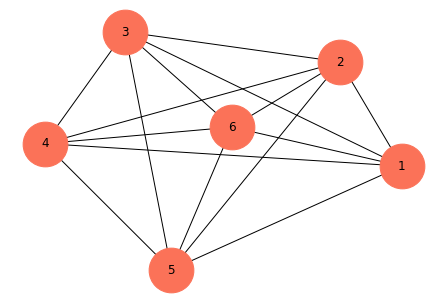

In [13]:
import networkx as nx
from math import e

distances = [(1, 2, 20),
            (1, 3, 40),
            (1, 4, 42), 
            (1, 5, 33),
            (1, 6, 21),
            (2, 3, 26),
            (2, 4, 38),
            (2, 5, 42),
            (2, 6, 17),
            (3, 4, 22),
            (3, 5, 43),
            (3, 6, 21),
            (4, 5, 27),
            (4, 6, 22),
            (5, 6, 26)]

V = [1, 4, 5, 2, 6, 3, 1] # Route sequence
Z = [(3, 4),
    (4, 6),
    (5, 2),
    (6, 2)] # Sequence of vertex substitutions
P = [49, 54, 43, 54] # Random numbers that were generated during calculation

T = 100 # Initial temperature

# Function to calculate the probability of accepting a worse solution
def probability(delta, T):
    return 100 * e ** (-delta / T)

# Function to reduce the temperature
def reductTemp(prevT):
    nextT = .5 * prevT
    return nextT

# The acceptance probability is calculated using the Metropolis-Hastings algorithm, 
# which is based on the difference between the current and proposed solutions and the 
# current temperature of the system. As the temperature decreases, the acceptance probability also decreases, 
# making it less likely that the algorithm will accept solutions that are worse than the current solution.

graph = nx.Graph() # Create an empty graph
graph.add_weighted_edges_from(distances) # Add weighted edges to the graph

# Draw the graph with the specified vertices
nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)


Теперь, напишем необходимые, согласно алгоритму выше, функции для 
работы метода имитации отжига. Вычислим длину ребра:



            <!-- Simulated Annealing is a probabilistic optimization algorithm used to find the global minimum of a function that may have many local minima. It is inspired by the annealing process in metallurgy, where a metal is heated to a high temperature and then slowly cooled, allowing it to reach a low-energy crystalline state.

In the context of this code, "Functions for working with the Simulated Annealing method" refers to a set of functions that are used to find the optimal route for the traveling salesman problem using the Simulated Annealing algorithm. These functions include:

edgeLength: calculates the length of an edge between two nodes in a graph
routeLength: calculates the length of a route given a set of nodes and their connections
routeOneReplacement: performs a single replacement of two nodes in a route
routeReplacement: performs a set of replacements in a route
chooseRoute: chooses the best route by applying the Simulated Annealing algorithm
drawRouteGraph: draws the graph of the best route found by the Simulated Annealing algorithm. -->

Лучший выбранный маршрут: [1, 6, 2, 3, 4, 5, 1]
Длина лучшего выбранного маршрута: 146
Длины всех рассмотренных маршрутов: [189, 209, 186, 146, 166]


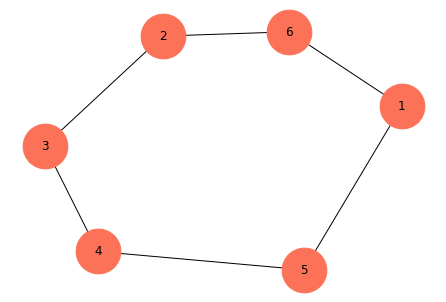

In [14]:
#вычисление длины ребра
def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                   for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

#вычисление длины маршрута
def routeLength(V, distances):
    edges = []
    
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
    
    return sum(edges)

#одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0
    
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    
    return arrV

#перестановка в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

#выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) #нахождение длины пути
    arrSum = [sumLength] #массив сумм длин
    
    #циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) #новый маршрут после перестановки
        newS = routeLength(newV, distances) #длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength #разница между длиной нового и старого маршрутов
        
        #в случае, если разница между длинами больше 0, то вычисляется вероятность
        if deltaS > 0:
            p = probability(deltaS, T) #подсчёт вероятности
            
            #если заданная вероятность попадает в интервал от 0 до p, то новый маршрут выбирается
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
            
        T = reductTemp(T) #вычисление температуры
    
    return V, arrSum

#отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    #прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
    
    graph = nx.Graph() #создание пустого графа
    
    graph.add_weighted_edges_from(newDistances) #добавление весов рёбер
    #отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)
    
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) #отрисовка лучшего маршрута

Задание
Найти длину гамильтонова цикла S4 в полном графе K6 после четырех 
циклов решения задачи методом отжига по вариантам ниже.

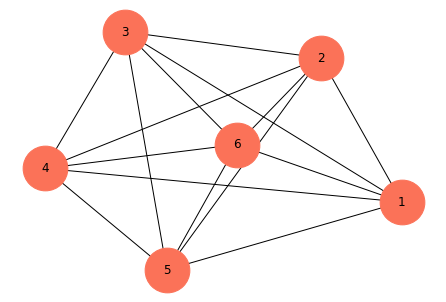

In [19]:
import networkx as nx 
from math import e

distances = [(1, 2,25),
            (1, 3, 41),
            (1, 4, 38),
            (1, 5, 27),
            (1, 6, 20),
            (2, 3,21),
            (2, 4, 34),
            (2, 5, 39),
            (2, 6, 17),
            (3, 4, 24),
            (3, 5, 40),
            (3, 6, 22),
            (4, 5, 21),
            (4, 6, 21),
            (5, 6, 22)] # длины рёбер
V = [1, 3, 5, 4, 6, 2 ,1] # последовательность прохождения маршрута
Z = [(3,4),
    (4, 6),
    (5,6),
    (2,4)] # последовательность замен вершин 
P = [41,60,85,60] # случайные числа, быпавшие в процессе счёта
T = 100 # начальная температура

# функция бероятности
def probability(delta, T): 
    return 100 * e ** (-delta / T)

# функция изменения температуры 
def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT

graph = nx.Graph() # создание пустого графа 
graph.add_weighted_edges_from(distances) # добавление весов рёбер

# отрисовка графа с заданными бершинами 
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

Лучший выбранный маршрут: [1, 2, 4, 3, 6, 5, 1]
Длина лучшего выбранного маршрута: 154
Длины всех рассмотренных маршрутов: [165, 150, 165, 180, 154]


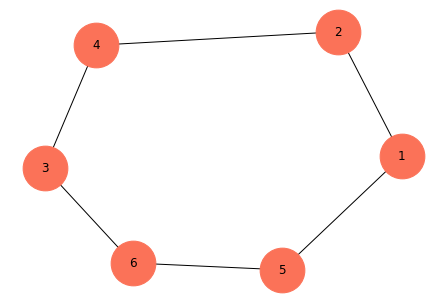

In [20]:
# вычисление длины маршрута
def routeLength(V, distances): 
    edges = []

    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
        
    return sum(edges)

# одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

# перестановки в пути 
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V
# быбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P): 
    sumLength = routeLength(V, distances) # нахождение длины numa
    arrSum = [sumLength] # массиб сумм длин

    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый марирут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута 
        arrSum.append(newS) 
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов

        # в случае, если разница между длинами больше 0, то вычисляется вероятность 
        if deltaS > 0:
            p = probability(deltaS, T) # подсчет вероятности
            
            # если заданная вероятность попадает в интердал от 0 до р, то новый маршрут выбирается 
            if p > P[i]: 
                V = newV 
                sumLength = newS
        else: 
            V = newV 
            sumLength = newS
        T = reductTemp(T) # вычисление температуры
    
    return V, arrSum
# отрсовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = [] 
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]: 
                newDistances.append(distance)

    graph = nx.Graph() # создание пустого графа

    graph.add_weighted_edges_from(newDistances) # добабление весоб ребер 
    #отрисовка графа с заданными вершинами 
    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}') 
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}') 
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances,bestRoute)